### Задание 1.
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [71]:
df = pd.read_csv('HW-17 Data\\Water.csv', header = 0)

In [72]:
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


<AxesSubplot:xlabel='mortality', ylabel='hardness'>

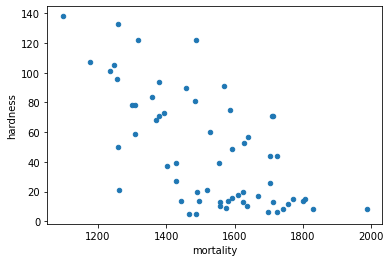

In [73]:
#Построить точечный график
df.plot(kind='scatter', x='mortality', y='hardness')

In [74]:
#Рассчитать коэффициенты корреляции Пирсона и Спирмена
p_cor = df[['mortality', 'hardness']].corr()
s_cor = df[['mortality', 'hardness']].corr(method='spearman')
print('По Пирсону:')
print(p_cor)
print('По Спирмену:')
print(s_cor)

По Пирсону:
           mortality  hardness
mortality   1.000000 -0.654849
hardness   -0.654849  1.000000
По Спирмену:
           mortality  hardness
mortality   1.000000 -0.631665
hardness   -0.631665  1.000000


In [75]:
#Построить модель линейной регрессии
X = df[['hardness']]
y = df['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train.shape
y_train.shape
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [76]:
#Смотрим расхождение
res_df = X_test.copy()
res_df['y_pred'] = y_pred
res_df['y_test'] = y_test
res_df.head()

,hardness,y_pred,y_test
0,105,1340.146856,1247
5,10,1637.655589,1558
46,14,1625.128906,1495
31,44,1531.178779,1702
13,78,1424.701970,1307


In [77]:
# Рассчитать коэффициент детерминации
model.score(X_test, y_test)

0.5046490611017092

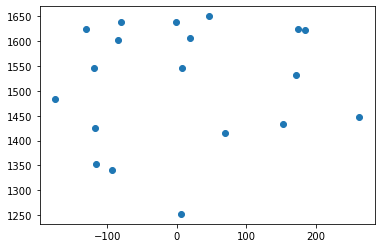

In [86]:
#Вывести график остатков
residuals = y_test-y_pred
plt.scatter(residuals,y_pred)
plt.show()

Для полного датасета наблюдается обратная зависимость смертности от жесткости воды.

### Задание 2.
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

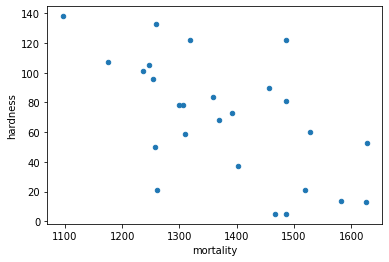

По Пирсону:
           mortality  hardness
mortality   1.000000 -0.602153
hardness   -0.602153  1.000000
По Спирмену:
           mortality  hardness
mortality   1.000000 -0.595723
hardness   -0.595723  1.000000
Коэффициент детерминации: -2.551922301235205


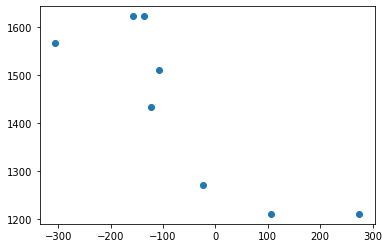

In [89]:
def calc(df):
    df.plot(kind='scatter', x='mortality', y='hardness')
    plt.show()
    #Рассчитать коэффициенты корреляции Пирсона и Спирмена
    p_cor = df[['mortality', 'hardness']].corr()
    s_cor = df[['mortality', 'hardness']].corr(method='spearman')
    print('По Пирсону:')
    print(p_cor)
    print('По Спирмену:')
    print(s_cor)
    #Построить модель линейной регрессии
    X = df[['hardness']]
    y = df['mortality']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
    X_train.shape
    y_train.shape
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    coef_d = model.score(X_test, y_test)
    print(f'Коэффициент детерминации: {coef_d}')
    residuals = y_test-y_pred
    plt.scatter(residuals,y_pred)
    plt.show()

calc(df.loc[df['location']=='South'])


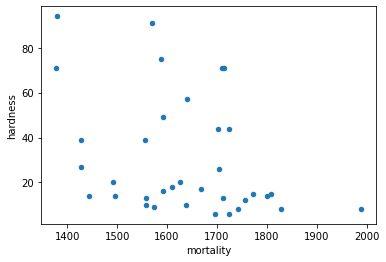

По Пирсону:
           mortality  hardness
mortality   1.000000 -0.368598
hardness   -0.368598  1.000000
По Спирмену:
           mortality  hardness
mortality   1.000000 -0.404208
hardness   -0.404208  1.000000
Коэффициент детерминации: 0.018885304285745863


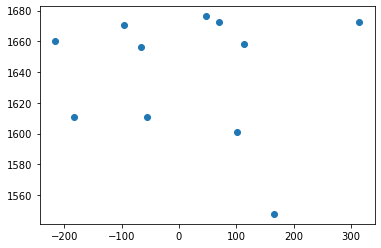

In [90]:
calc(df.loc[df['location']=='North'])

При разбивке датасета на 2 для северных и южных городов аналогичная зависимость не наблюдается.